<a href="https://colab.research.google.com/github/Alton1998/Scoliosis/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
X_train_reg = []
X_test_reg = []
X_val_reg = []
y_train_reg = []
y_test_reg = []
y_val_reg = []
with open("X_train_reg.pkl","rb") as f1, open("X_test_reg.pkl","rb") as f2, open("X_val_reg.pkl","rb") as f3, open("y_train_reg.pkl","rb") as f4, open("y_test_reg.pkl","rb") as f5, open("y_val_reg.pkl","rb") as f6:
  X_train_reg = pickle.load(f1)
  X_test_reg = pickle.load(f2)
  X_val_reg = pickle.load(f3)
  y_train_reg = pickle.load(f4)
  y_test_reg = pickle.load(f5)
  y_val_reg = pickle.load(f6)

In [3]:
X_train_reg = X_train_reg.values
X_test_reg = X_test_reg.values
X_val_reg = X_val_reg.values
y_train_reg = y_train_reg.values
y_test_reg = y_test_reg.values
y_val_reg = y_val_reg.values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
# Scaling the data based on training
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_val_reg = scaler.transform(X_val_reg)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [8]:
error = []

for i in range(5,30,2):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train_reg,y_train_reg)
  y_val_pred = knn.predict(X_val_reg)
  error.append(mean_squared_error(y_val_reg,y_val_pred))

Text(0, 0.5, 'Error Rate')

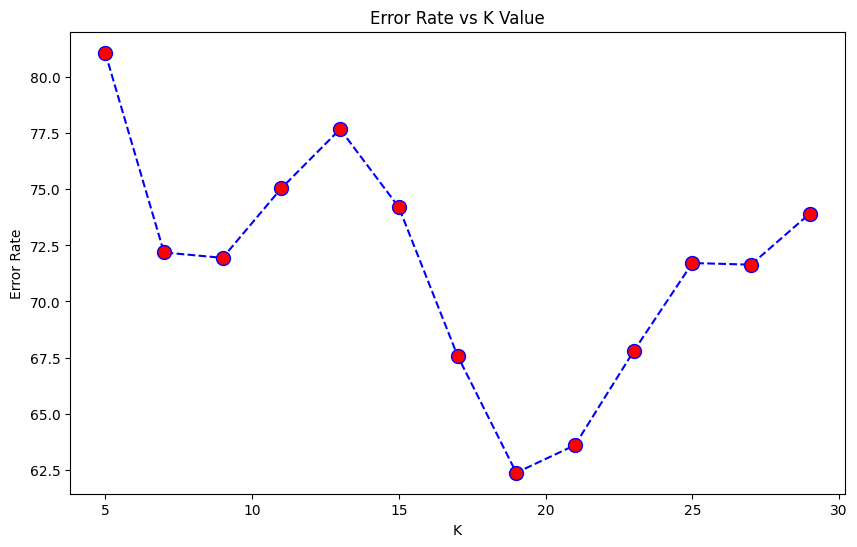

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(5,30,2),
    error,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [10]:
knn=KNeighborsRegressor(n_neighbors=19)

In [11]:
knn.fit(X_train_reg,y_train_reg)

KNeighborsRegressor(n_neighbors=19)

In [12]:
y_val_pred = knn.predict(X_val_reg)

In [13]:
y_val_pred

array([ 2.07894737, -1.68421053, -0.47368421,  0.71052632,  0.73684211,
        0.63157895,  1.21052632, -1.73684211, -2.52631579, -0.94736842,
       -1.92105263, -4.        , -0.36842105])

In [14]:
y_val_reg

array([ 12.,  10.,   0.,   7.,  13.,  -8.,  -6.,  -2., -12.,  -4.,  10.,
        -8.,   1.])

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
mean_absolute_error(y_val_reg,y_val_pred)

6.657894736842105

In [17]:
mean_squared_error(y_val_reg,y_val_pred)

62.36410611549115

In [18]:
np.sqrt(mean_squared_error(y_val_reg,y_val_pred))

7.897094789572375

In [19]:
y_test_pred = knn.predict(X_test_reg)

In [20]:
mean_absolute_error(y_test_reg,y_test_pred)

6.120158887785502

In [21]:
mean_squared_error(y_test_reg,y_test_pred)

64.8560602101082